In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.5 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

In [ ]:
reviews = pd.read_csv("imdbReviews.csv")

In [ ]:
reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [ ]:
# Create a new column containing the length each review
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

In [ ]:
print("The longest review has: {} words".format(reviews.Text_len.max()))

The longest review has: 1843 words


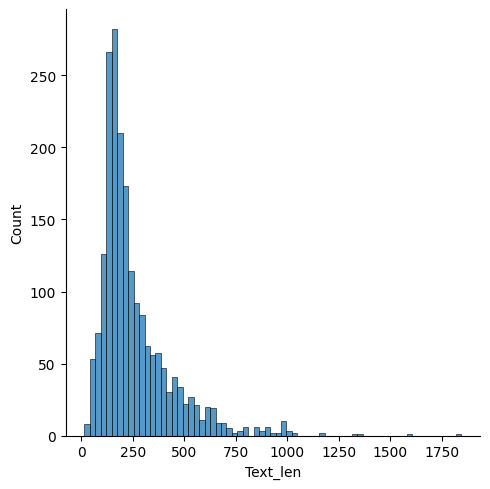

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [ ]:
text = reviews['Text']

text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)


text1[:2]

['girlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more although the film is not about boxing boxing is all about the film so much so you can almost smell the sweat technically and artistically a good shoot with an sense of honesty and reality about it girlfight is no chick flick and no rocky it is rather a very human drama which even viewers who dont know boxing will be able to connect withgirlfight follows a project dwelling new york high school girl from a sense of futility into the world of amateur boxing where she finds self esteem purpose and much more',
 'hollywood north is an euphemism from the movie industry as they went to canada to make movies because of tax breaks and cheaper costs in a civilized city like toronto in this case later in vancouver peter obrian the director probably saw a lot of the invaders from california that this movie seems to be the right 

In [ ]:
text1 = pd.Series(text1)
text1[:2]

0    girlfight follows a project dwelling new york ...
1    hollywood north is an euphemism from the movie...
dtype: object

In [ ]:
#remove stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['film','movie', 'get', 'see', 'make', 'one']
stopwords.extend(newStopWords)

#Setting English stopwords
stop_words = set(stopwords)

#text = reviews['Text']
text2 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text2[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    girlfight follows project dwelling new york hi...
1    hollywood north euphemism industry went canada...
2    show definitely funniest show currently tv sta...
3    minutes pure holiday terror okay scary sure fu...
4    series random seemingly insignificant thefts s...
dtype: object

In [ ]:
#apply lemmatising with POS tags

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text2.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:2]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    girlfight follow project dwell new york high s...
1    hollywood north euphemism industry go canada m...
dtype: object

In [ ]:
reviews['Text'] = text3
reviews.head()

,Index,URL,Text,Sentiment,Text_len
0,3617,http://www.imdb.com/title/tt0210075/usercomments,girlfight follow project dwell new york high s...,POS,124
1,3671,http://www.imdb.com/title/tt0337640/usercomments,hollywood north euphemism industry go canada m...,POS,235
2,3157,http://www.imdb.com/title/tt0303549/usercomments,show definitely funniest show currently tv sta...,POS,232
3,660,http://www.imdb.com/title/tt0716825/usercomments,minute pure holiday terror okay scary sure fun...,POS,153
4,265,http://www.imdb.com/title/tt0182225/usercomments,series random seemingly insignificant theft si...,POS,377


In [ ]:
# Create a new column containing the length each review after preprocessing
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

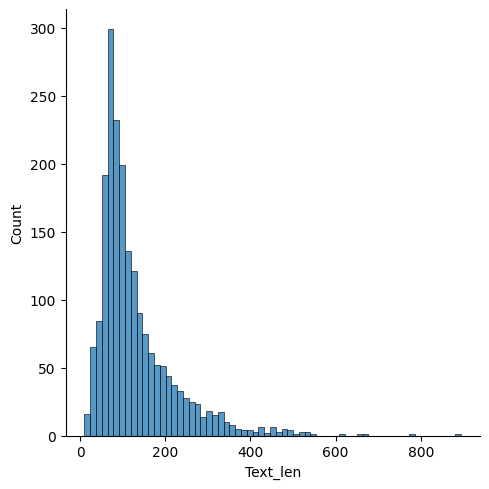

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [ ]:
from bertopic import BERTopic

#default uses HDBSCAN
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
review_topics, probs = model.fit_transform(reviews.Text)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2023-11-09 11:02:15,084 - BERTopic - Transformed documents to Embeddings
2023-11-09 11:02:35,514 - BERTopic - Reduced dimensionality
2023-11-09 11:02:35,692 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 9


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1364,-1_like_time_make_go,"[like, time, make, go, good, well, character, ...",[house game spell binding nice occasionally fi...
1,0,242,0_bad_horror_like_watch,"[bad, horror, like, watch, act, really, zombie...",[guess ive see bad film may becuz im jade stan...
2,1,183,1_love_time_great_character,"[love, time, great, character, life, well, cas...",[girlfriend habit go blockbuster choose movie ...
3,2,54,2_show_season_watch_episode,"[show, season, watch, episode, tv, first, love...",[best original show see year watch fall love c...
4,3,40,3_book_read_bad_character,"[book, read, bad, character, well, make, perfo...",[syriana swept critic upon release everything ...


In [ ]:
freq.head(9)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1364,-1_like_time_make_go,"[like, time, make, go, good, well, character, ...",[house game spell binding nice occasionally fi...
1,0,242,0_bad_horror_like_watch,"[bad, horror, like, watch, act, really, zombie...",[guess ive see bad film may becuz im jade stan...
2,1,183,1_love_time_great_character,"[love, time, great, character, life, well, cas...",[girlfriend habit go blockbuster choose movie ...
3,2,54,2_show_season_watch_episode,"[show, season, watch, episode, tv, first, love...",[best original show see year watch fall love c...
4,3,40,3_book_read_bad_character,"[book, read, bad, character, well, make, perfo...",[syriana swept critic upon release everything ...
5,4,38,4_war_time_event_first,"[war, time, event, first, would, well, battle,...",[mind weak original star war trilogy variety r...
6,5,33,5_stewart_story_play_western,"[stewart, story, play, western, character, win...",[narrative affirms classic image good versus e...
7,6,23,6_bollywood_story_kapoor_khan,"[bollywood, story, kapoor, khan, time, actor, ...",[see fun ive cinema long time however able say...
8,7,23,7_batman_like_li_kong,"[batman, like, li, kong, jet, kurosawa, charac...",[batman superman iconic well part century old ...


In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('bad', 0.048163008627237075),
 ('horror', 0.029357194406895087),
 ('like', 0.026654269648863912),
 ('watch', 0.02488719534632072),
 ('act', 0.023388621109204137),
 ('really', 0.022209823650371815),
 ('zombie', 0.021624897352799505),
 ('even', 0.02121424090349316),
 ('go', 0.020738084330223155),
 ('make', 0.01947425945383288)]

In [ ]:
model.visualize_barchart(n_words=10)

In [ ]:
model.visualize_topics()

In [ ]:
#Bert topic with k-means

from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=10)
#KMmodel = BERTopic(hdbscan_model=cluster_model)

KMmodel = BERTopic(hdbscan_model=cluster_model, verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
KM_topics, KMprobs = KMmodel.fit_transform(reviews.Text)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2023-11-09 11:20:19,402 - BERTopic - Transformed documents to Embeddings
2023-11-09 11:20:30,259 - BERTopic - Reduced dimensionality
2023-11-09 11:20:30,411 - BERTopic - Clustered reduced embeddings


In [ ]:
KMfreq = KMmodel.get_topic_info()
print("Number of topics: {}".format( len(KMfreq)))
KMfreq.head()

Number of topics: 10


,Topic,Count,Name,Representation,Representative_Docs
0,0,367,0_bad_like_watch_go,"[bad, like, watch, go, act, even, really, make...",[easily bad series though new line might look ...
1,1,209,1_like_watch_show_time,"[like, watch, show, time, well, good, go, love...",[riget ii good sequel quite good first series ...
2,2,202,2_time_like_know_say,"[time, like, know, say, would, go, people, mak...",[left behind kind know know cause know christi...
3,3,192,3_like_make_story_time,"[like, make, story, time, character, kid, even...",[first let say great believer fanpro stuff way...
4,4,180,4_story_like_would_time,"[story, like, would, time, character, make, we...",[ive read comment come conclusion almost every...


In [ ]:
KMfreq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,0,367,0_bad_like_watch_go,"[bad, like, watch, go, act, even, really, make...",[easily bad series though new line might look ...
1,1,209,1_like_watch_show_time,"[like, watch, show, time, well, good, go, love...",[riget ii good sequel quite good first series ...
2,2,202,2_time_like_know_say,"[time, like, know, say, would, go, people, mak...",[left behind kind know know cause know christi...
3,3,192,3_like_make_story_time,"[like, make, story, time, character, kid, even...",[first let say great believer fanpro stuff way...
4,4,180,4_story_like_would_time,"[story, like, would, time, character, make, we...",[ive read comment come conclusion almost every...
5,5,178,5_horror_zombie_bad_like,"[horror, zombie, bad, like, well, really, look...",[time overtakes thing favourite horror carpent...
6,6,176,6_love_story_time_life,"[love, story, time, life, character, woman, li...",[titanic direct james cameron present fictiona...
7,7,172,7_great_good_best_time,"[great, good, best, time, cast, musical, well,...",[much like big epic picture ill spare namedrop...
8,8,167,8_character_like_story_book,"[character, like, story, book, really, make, g...",[come movie pretty picky ill complain anything...
9,9,157,9_character_like_play_go,"[character, like, play, go, story, man, well, ...",[sat tivo week watch dread selfindulgent yuppi...


In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
KMmodel.get_topic(a_topic) # Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('bad', 0.044019479416866084),
 ('like', 0.028059914611476448),
 ('watch', 0.027147761847231562),
 ('go', 0.021278190103821377),
 ('act', 0.020671472558079315),
 ('even', 0.020103731255892175),
 ('really', 0.01970854068900024),
 ('make', 0.0192189420609278),
 ('say', 0.01921771390922849),
 ('ever', 0.01902397044947545)]

In [ ]:
KMmodel.visualize_barchart(top_n_topics=10, n_words = 10)

In [ ]:
KMmodel.visualize_topics()

In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP

# Prepare embeddings
docs = reviews.Text
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

# Train BERTopic
topic_model = BERTopic().fit(docs, embeddings)

# Run the visualization with the original embeddings
topic_model.visualize_documents(docs, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
#reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
#topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

2023-11-09 13:00:26,155 - BERTopic - Reduced dimensionality
2023-11-09 13:00:26,320 - BERTopic - Clustered reduced embeddings
